## Цель работы: изучение и анализ поисковых алгоритмов минимизации функции одной переменной: дихотомического, Фибоначчи и «золотого сечения».

## Вариант 10
$$
f(x) =-\frac{x}{e^x}, a = 0, b = 3
$$

### Реализация методов

In [47]:
class OneDimensionalOptimization:
    def __init__(self, a, b, func, deriv):
        self.a, self.b = a, b
        self.func = func
        self.deriv =  deriv

    def dihotomy(self, eps = 0.001):
        a, b = self.a, self.b
        size = b - a
        iter = 0
        
        while (size > 2*eps):
            center = (a+b)/2
            x1, x2 = center - eps/2, center + eps/2
            
            if self.func(x1) > self.func(x2):
                a = x1
            else:
                b = x2

            size = b - a
            iter += 1
            print(f'iter: {iter} | set: [{a},{b}]')

        return self.func((a+b)/2), iter*2

    def nums(self, n):
        res = []
        fib1 = fib2 = 1
        res.append(fib1)
        res.append(fib2)
        n -= 2
         
        while n > 0:
            fib1, fib2 = fib2, fib1 + fib2
            res.append(fib2)
            n -= 1
            
        return res

    def num(self, n):
        if n in (1, 2):
            return 1
        return self.num(n - 1) + self.num(n - 2)

    def fibonacci(self, eps = 0.001):
        a, b = self.a, self.b
        limit = (b-a)/eps
        n = 0
        Fn = 0
        while (Fn <= limit):
            n+=1
            Fn = self.num(n)       
            
        F, L = self.nums(n), b - a
        f1, f2 = 0, 0
        k = n - 1
        iter = 0
        
        while (k > 1):
            delta = (F[k-1]/F[k])*L
            x1, x2 = a + delta, b - delta
            f1, f2 = self.func(x1), self.func(x2)
            if f1 > f2:
                b = x1
                f1, x1 = f2, x2
                L = b - a
                x2, f2 = a + b - x1, self.func(x2)
            else:
                a = x2
                f2, x2 = f1, x1
                L = b - a
                x1, f1 = b - (x2 - a), self.func(x1)
            k -= 1
            iter += 1
            print(f'iter: {iter} | set: [{a},{b}]')

        return min(f1, f2), iter

    def golden_ratio(self, tau = 0.618, eps = 0.001):
        a, b = self.a, self.b
        L = b - a
        iter = 0
        f1, f2 = 0, 0

        while(L > eps):
            delta =  L*tau
            x1, x2 = a + delta, b - delta
            f1, f2 = self.func(x1), self.func(x2)
    
            if f1 > f2:
                b = x1
                f1, x1 = f2, x2
                L = b - a
                x2, f2 = a + b - x1, self.func(x2)
    
            else:
                a = x2
                f2, x2 = f1, x1
                L = b - a
                x1, f1 = b - (x2 - a), self.func(x1)

            iter += 1
            print(f'iter: {iter} | set: [{a},{b}]')
                
        return min(f1, f2), iter
    
    def binary_division(self, eps = 0.001):
        a = self.a
        b = self.b
        iter = 0
        treshold = 2*eps/(b-a)
        n=0

        while (0.5**n >= treshold):
            n+=1

        k = 0
        
        while(k < n-1):
            k +=1
            x = (a+b)/2
            der_value = self.deriv(x)
            if der_value == 0:
                return self.func(x)
            elif der_value > 0:
                b = x
            else:
                a = x

            iter += 1
            print(f'iter: {iter} | set: [{a},{b}]')

        return self.func((a+b)/2), iter

### Тестирование

In [48]:
import math
odo = OneDimensionalOptimization(0, 3, lambda x: -x/math.exp(x), lambda x: (x-1)/math.exp(x))

In [49]:
dih = odo.dihotomy(eps = 0.1)
print(dih)

iter: 1 | set: [0,1.55]
iter: 2 | set: [0.725,1.55]
iter: 3 | set: [0.725,1.1875]
iter: 4 | set: [0.90625,1.1875]
iter: 5 | set: [0.90625,1.096875]
(-0.3678789925673678, 10)


In [50]:
fib = odo.fibonacci(eps = 0.1)
print(fib)

iter: 1 | set: [0,1.8529411764705883]
iter: 2 | set: [0.7058823529411764,1.8529411764705883]
iter: 3 | set: [0.7058823529411764,1.411764705882353]
iter: 4 | set: [0.7058823529411764,1.1470588235294117]
iter: 5 | set: [0.8823529411764706,1.1470588235294117]
iter: 6 | set: [0.8823529411764706,1.0588235294117647]
iter: 7 | set: [0.9705882352941176,1.0588235294117647]
(-0.3677171691342093, 7)


In [51]:
gld = odo.golden_ratio(eps = 0.1)
print(gld)

iter: 1 | set: [0,1.854]
iter: 2 | set: [0.7082280000000001,1.854]
iter: 3 | set: [0.7082280000000001,1.416315096]
iter: 4 | set: [0.7082280000000001,1.145825825328]
iter: 5 | set: [0.875390369275296,1.145825825328]
iter: 6 | set: [0.875390369275296,1.0425194811158671]
iter: 7 | set: [0.9392336899983942,1.0425194811158671]
iter: 8 | set: [0.9786888622052689,1.0425194811158671]
(-0.36787771750385473, 8)


In [52]:
bin = odo.binary_division(eps = 0.1)
print(bin)

iter: 1 | set: [0,1.5]
iter: 2 | set: [0.75,1.5]
iter: 3 | set: [0.75,1.125]
(-0.3671302750094991, 3)


### Составление таблиц

In [53]:
import numpy as np

In [54]:
eps_set = [0.1, 0.01, 0.001, 0.0001, 0.00001]

In [ ]:
results_dih = []
results_gld = []
results_fib = []
results_bin = []
for i in eps_set:
    results_dih.append(odo.dihotomy(eps = i)[0])
    results_gld.append(odo.fibonacci(eps = i)[0])
    results_fib.append(odo.golden_ratio(eps = i)[0])
    results_bin.append(odo.binary_division(eps = i)[0])

In [56]:
import pandas as pd

In [57]:
res = pd.DataFrame(data = {'eps': eps_set, 'dihotomy': results_dih, 'fibonacci': results_fib, 'golden_ratio': results_gld, 'binary_division': results_bin})

In [58]:
res

,eps,dihotomy,fibonacci,golden_ratio,binary_division
0,0.10000,-0.367879,-0.367878,-0.367717,-0.367130
1,0.01000,-0.367879,-0.367879,-0.367878,-0.367877
2,0.00100,-0.367879,-0.367879,-0.367879,-0.367879
3,0.00010,-0.367879,-0.367879,-0.367879,-0.367879
4,0.00001,-0.367879,-0.367879,-0.367879,-0.367879


### Графики

In [ ]:
eps_set = np.arange(0.001, 0.1, 0.001)
iters_dih = []
iters_gld = []
iters_fib = []
iters_bin = []
for i in eps_set:
    iters_dih.append(odo.dihotomy(eps = i)[1])
    iters_gld.append(odo.golden_ratio(eps = i)[1])
    iters_fib.append(odo.fibonacci(eps = i)[1])
    iters_bin.append(odo.binary_division(eps = i)[1])

In [60]:
eps_set = np.log(eps_set)

In [61]:
import matplotlib.pyplot as plt

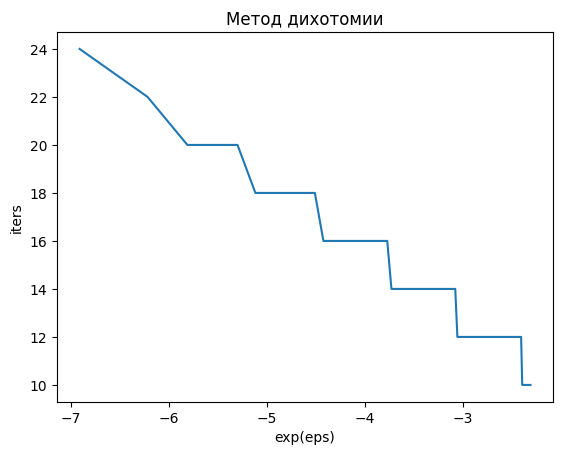

In [62]:
plt.plot(eps_set, iters_dih)
plt.title("Метод дихотомии")
plt.xlabel("exp(eps)")
plt.ylabel("iters")
plt.show()

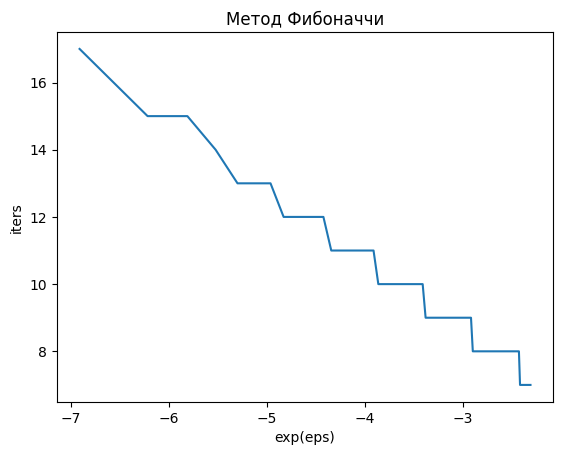

In [63]:
plt.plot(eps_set, iters_fib)
plt.title("Метод Фибоначчи")
plt.xlabel("exp(eps)")
plt.ylabel("iters")
plt.show()

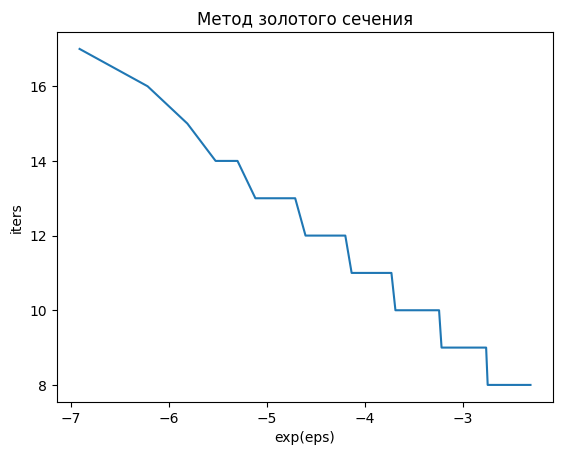

In [64]:
plt.plot(eps_set, iters_gld)
plt.title("Метод золотого сечения")
plt.xlabel("exp(eps)")
plt.ylabel("iters")
plt.show()

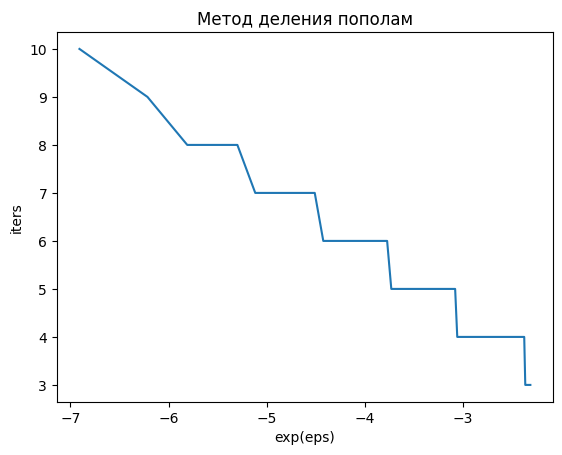

In [65]:
plt.plot(eps_set, iters_bin)
plt.title("Метод деления пополам")
plt.xlabel("exp(eps)")
plt.ylabel("iters")
plt.show()